# Tema 7 - laborator 9
Regresie liniară

Ex. 1.

a)

<Axes: >

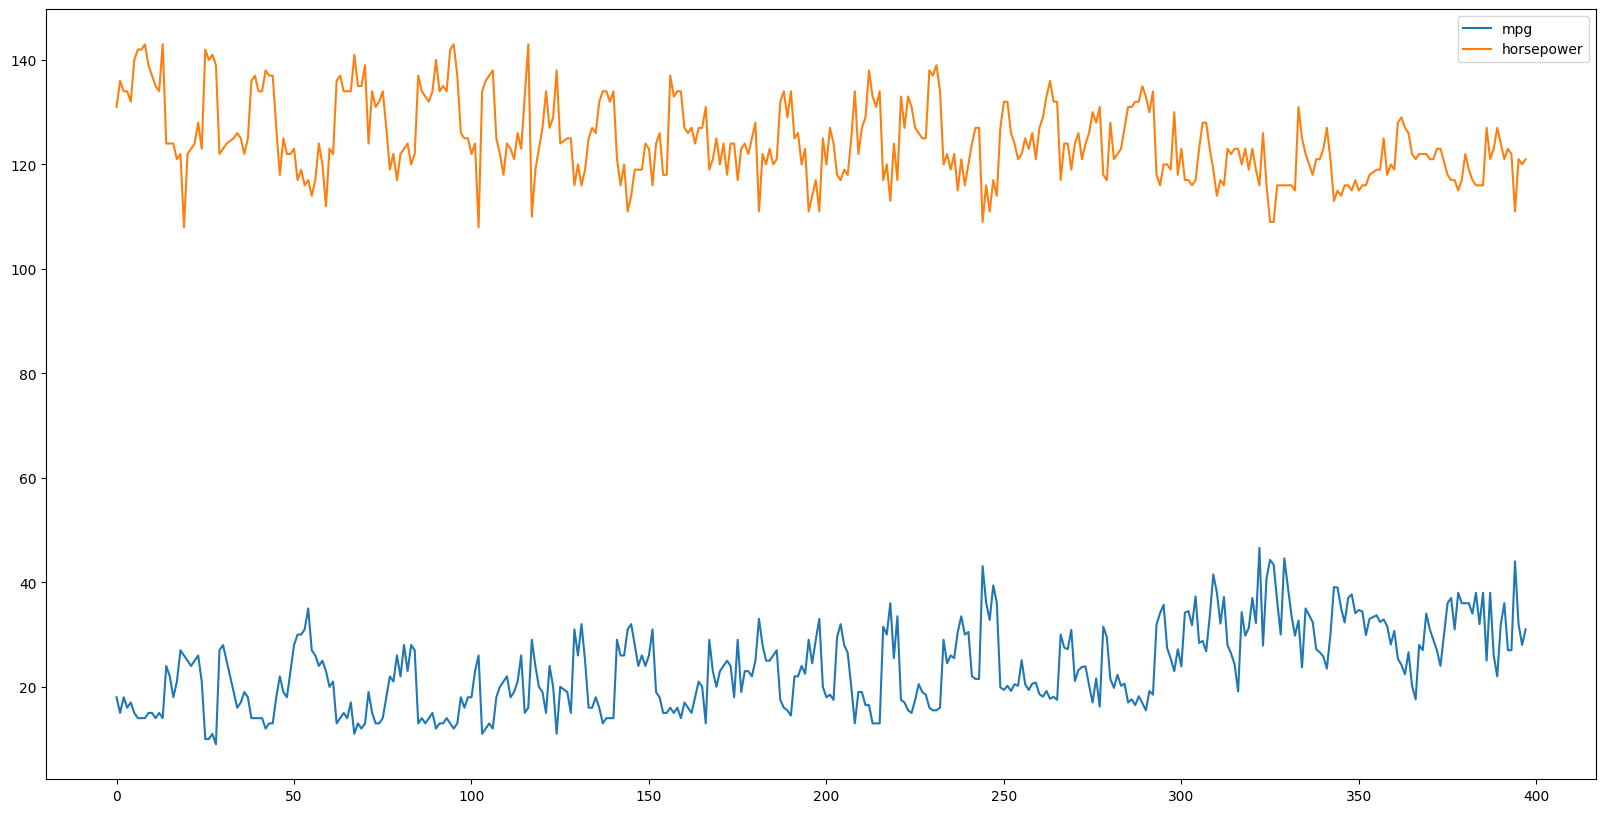

In [3]:
import pandas as pd

df = pd.read_csv('./auto-mpg.csv')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dropna(subset=['mpg', 'horsepower'], inplace=True)
df.plot(y=['mpg', 'horsepower'], kind='line', figsize=(20, 10))

Se observă ușor din grafic că variabilele __mpg__ și __horsepower__ sunt invers proporționale. 

b)

In [ ]:
import pymc as pm
import arviz as az

x = df['horsepower'] # variabila independenta
y = df['mpg'] # variabila dependenta

with pm.Model() as model_g:
  alpha = pm.Normal('alpha', mu=0, sigma=10)
  beta = pm.Normal('beta', mu=0, sigma=1)
  epsilon = pm.HalfCauchy('epsilon', 5)
  mu = pm.Deterministic('mu', alpha + beta*x)
  y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y)

  idata_g = pm.sample(2000, tune=2000, return_inferencedata=True)

az.plot_trace(idata_g, var_names=['alpha', 'beta', 'epsilon'])

c)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(x, y, 'C0.')
posterior_g = idata_g.posterior.stack(samples={"chain", "draw"})
alpha_m = posterior_g['alpha'].mean().item()
beta_m = posterior_g['beta'].mean().item()
draws = range(0, posterior_g.samples.size, 10)
plt.plot(x, posterior_g['alpha'][draws].values + posterior_g['beta'][draws].values * np.array(x)[:,None], c='gray', alpha=0.5)
plt.plot(x, alpha_m + beta_m * x, c='k', label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
plt.xlabel('horsepower')
plt.ylabel('mpg', rotation=0)
plt.legend()